# Paramount Skydance Corp PSKY

In [1]:
import pandas as pd

## The FinancialInstrument
Goal: Analyzing Financial Instruments (e.g. stocks) efficiently

In [2]:
#pip install --upgrade yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn-v0_8")

Note: you need __yfinance version 0.2.48 or higher__.

Check your currently installed version:

In [4]:
yf.__version__

'1.0'

You can upgrade with:

pip install --upgrade yfinance

In [5]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self.ticker, self.start, self.end, multi_level_index = False).Close.to_frame() # new from yfinance 0.2.48
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

__Instantiation__

In [6]:
stock = FinancialInstrument(ticker = "PSKY", start = "2000-07-01", 
                            end =  "2025-12-31" ) # instantiation

[*********************100%***********************]  1 of 1 completed


In [7]:
stock

FinancialInstrument(ticker = PSKY, start = 2000-07-01, end = 2025-12-31)

In [8]:
type(stock)

__main__.FinancialInstrument

__Attributes__

In [9]:
#stock.

In [10]:
stock.ticker

'PSKY'

In [11]:
stock.start

'2000-07-01'

In [12]:
stock.end

'2025-12-31'

In [13]:
stock.data

,price,log_returns
Date,,
2005-12-05,16.899967,NaN
2005-12-06,16.304987,-0.035841
2005-12-07,16.172066,-0.008186
2005-12-08,16.070793,-0.006282
2005-12-09,16.222710,0.009409
...,...,...
2025-12-19,13.050000,0.003070
2025-12-22,13.610000,0.042017
2025-12-23,13.530000,-0.005895


In [27]:
# exporting data to csv
stock.data.to_csv("PSKY_data.csv")

__Methods__

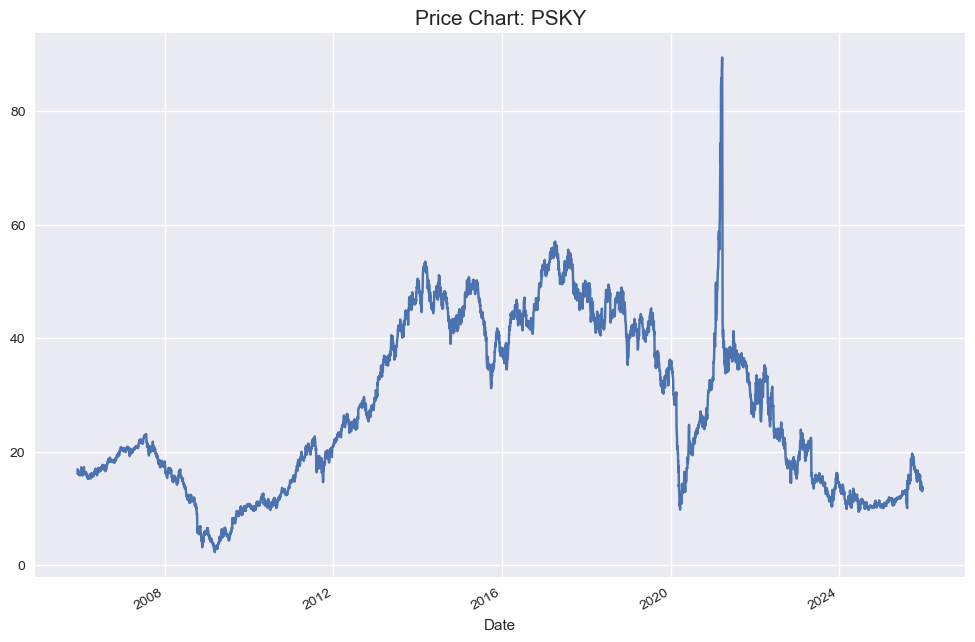

In [14]:
stock.plot_prices()

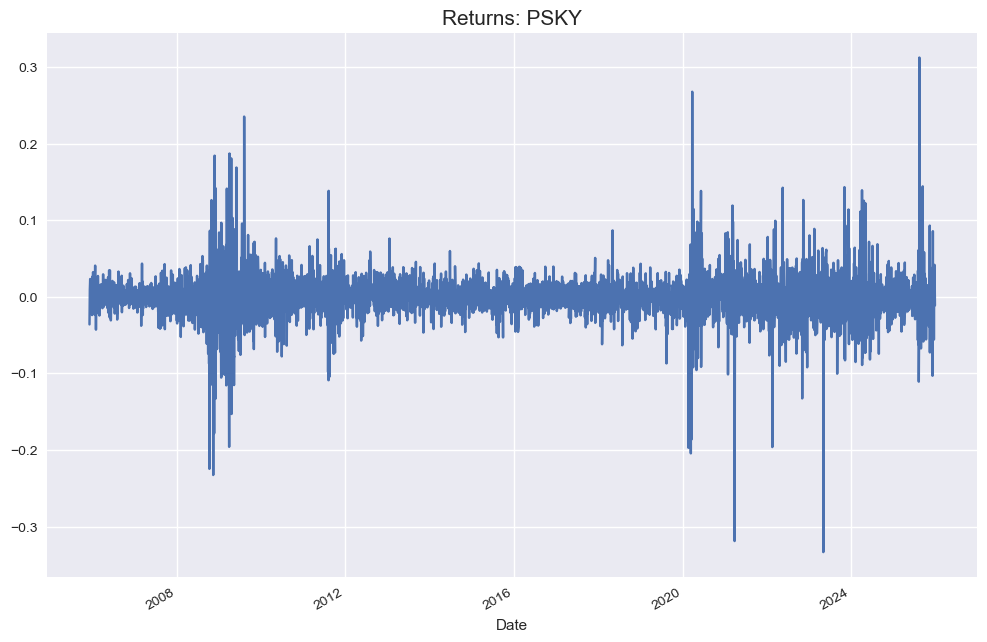

In [15]:
stock.plot_returns()

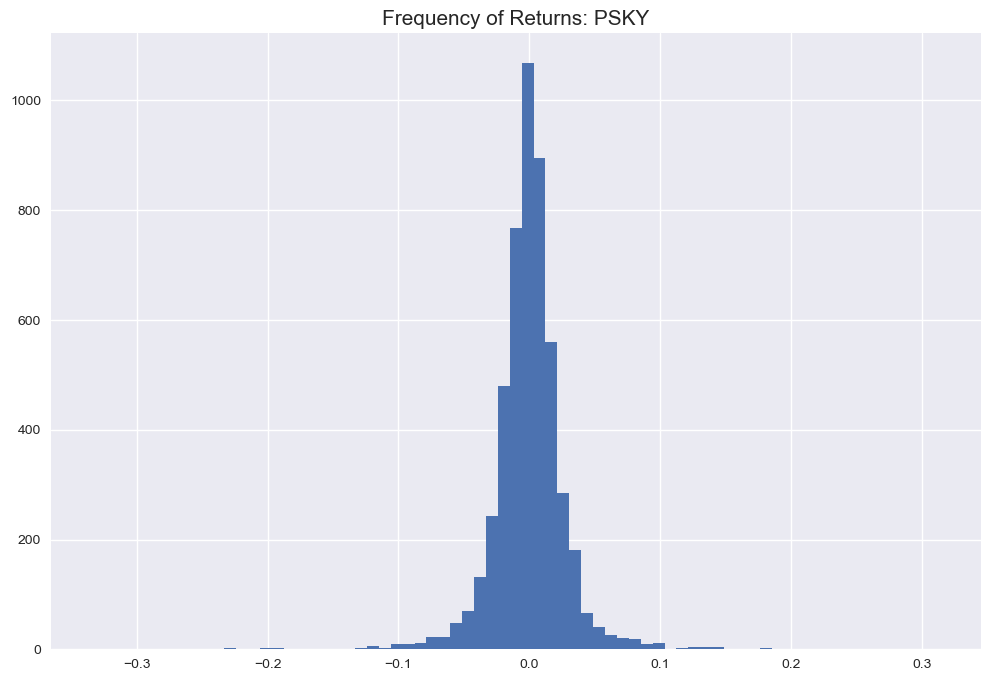

In [16]:
stock.plot_returns(kind = "hist")

In [17]:
stock.mean_return()

np.float64(-4.319806605811299e-05)

In [18]:
stock.data.log_returns.mean()

np.float64(-4.319806605811299e-05)

In [19]:
stock.mean_return(freq = "W") # NEW - replace w by W

np.float64(-0.00016929048929510896)

In [20]:
stock.std_returns()

0.02908951346413356

In [21]:
stock.std_returns(freq = "W") # NEW - replace w by W

0.06617190337060898

In [22]:
stock.annualized_perf()

Return: -0.011 | Risk: 0.462


#### Calling another ticker symbol

In [23]:
#stock.set_ticker("WBD")

In [24]:
#stock.ticker

In [25]:
#stock.plot_prices()

In [26]:
#stock.annualized_perf()

# Value-at-Risk(VaR)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
np.set_printoptions(precision=4, suppress=True)

In [33]:
returns = stock.data.log_returns.dropna().values

In [34]:
returns

array([-0.0358, -0.0082, -0.0063, ..., -0.0059,  0.0154, -0.011 ],
      shape=(5046,))

In [35]:
returns.size

5046

In [36]:
returns.mean()

np.float64(-4.319806605811294e-05)

In [37]:
returns.std()

np.float64(0.029086630888348446)

#### Probability Density Function

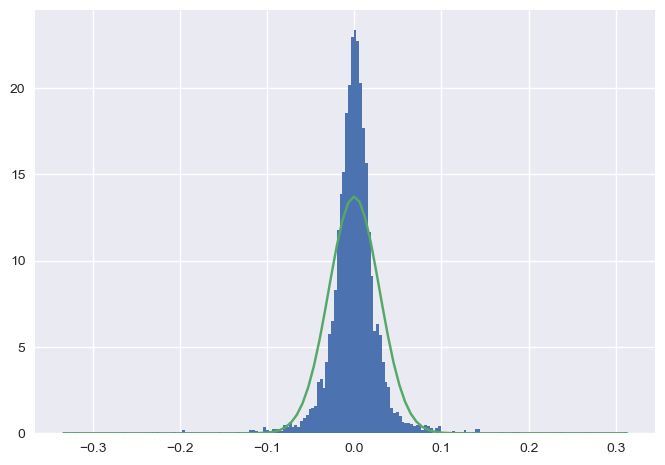

In [66]:
x = np.linspace(returns.min(), returns.max(), 100)
mu = returns.mean()
sigma = returns.std()
pdf = stats.norm.pdf(x, mu, sigma)
plt.hist(returns, bins = 200, density = True, label = "PSKY Returns Histogram")
plt.plot(x, pdf)
plt.show()

#### Probability density function assuming normal distribution of 1,000 values

In [39]:
x = np.linspace(-0.1, 0.1, 1000)

In [40]:
y = stats.norm.pdf(x, loc = returns.mean(), scale = returns.std())

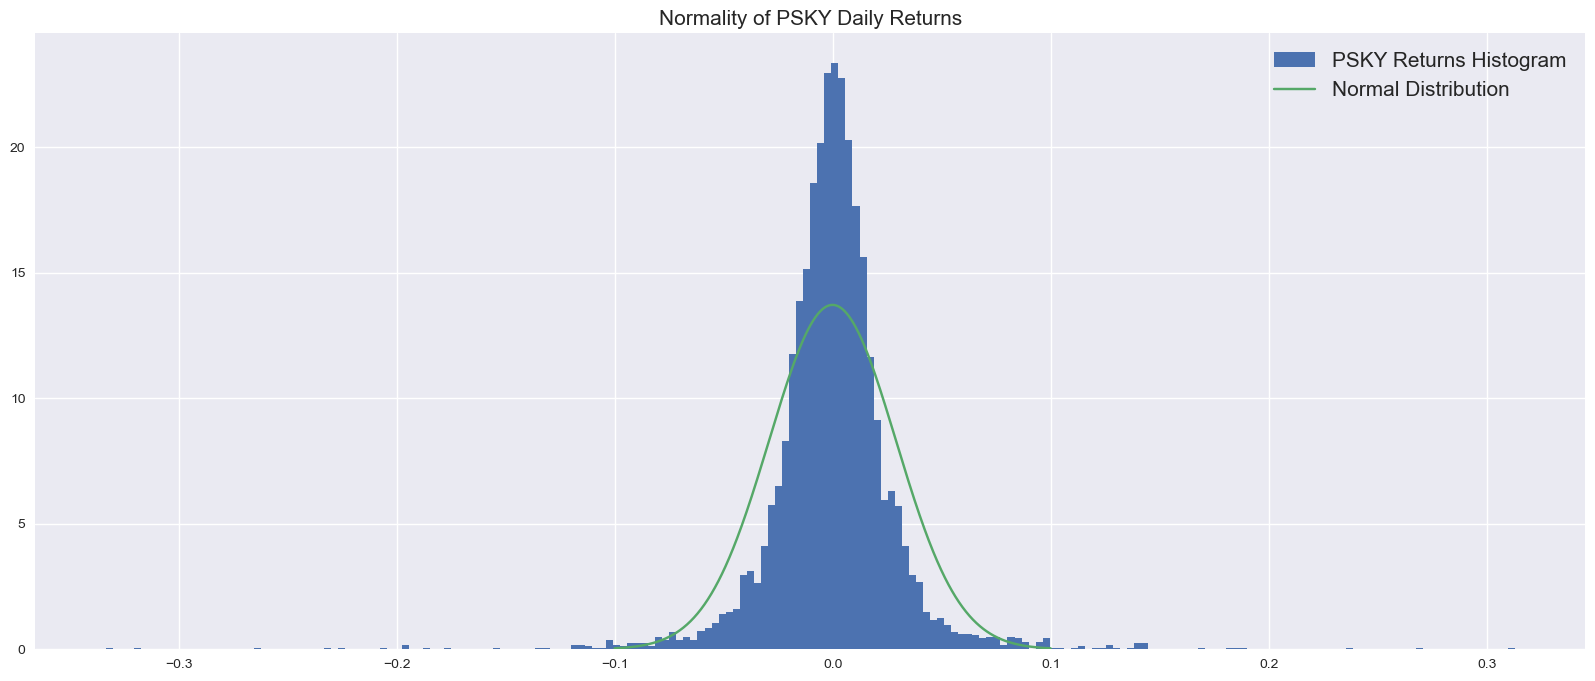

In [42]:
plt.figure(figsize = (20, 8))
plt.hist(returns, bins = 200, density = True, label = "PSKY Returns Histogram")
plt.plot(x, y, label = "Normal Distribution")
plt.title("Normality of PSKY Daily Returns", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [43]:
# skewness and kurtosis
from scipy.stats import skew, kurtosis
skewness = skew(returns)
kurt = kurtosis(returns)
print("Skewness: {:.4f}, Kurtosis: {:.4f}".format(skewness, kurt))

Skewness: -0.4091, Kurtosis: 19.4467


Skewness: -0.4091 - left skew

#### Hypothesis Test for Skewness and Kurtosis
Check the null-hypothesis = no skew (skew of zero)

In [45]:
stats.skewtest(returns)

SkewtestResult(statistic=np.float64(-11.435264611490133), pvalue=np.float64(2.78685795734713e-30))

Reject the null hypothesis - historical data has a skew differnt from zero.

In [46]:
# kurtosis test
stats.kurtosistest(returns)

KurtosistestResult(statistic=np.float64(35.03959607344798), pvalue=np.float64(5.616229876756849e-269))

p-value - indicates daily returns have fat tails <br/>
Retruns are NOT normally distributed


In [47]:
# normality test
stats.normaltest(returns)

NormaltestResult(statistic=np.float64(1358.5385697251897), pvalue=np.float64(9.933398484287873e-296))

p-value - indicates historical values are NOT normally distributed

#### Value at Risk (VaR) - Parametric Method


Estimate tail risk (extreme negative vbalues) of PSKY instorical data (and forecasts) <br/>
Calculate the minimum loss over one-day period that with 1% probablility: 1% Value-at-Risk(VaR) of 1,000,000 USD over a one-day period. Use the parametric method


In [50]:
#import numpy as np
#import scipy.stats as stats

In [51]:
returns

array([-0.0358, -0.0082, -0.0063, ..., -0.0059,  0.0154, -0.011 ],
      shape=(5046,))

In [52]:
returns.size

5046

##### 1% VaR of $1 Mil USD over a one-day period

In [53]:
IO = 1000000
prob = 0.01

In [54]:
mean = returns.mean()
std = returns.std()

In [56]:
mean

np.float64(-4.319806605811294e-05)

In [57]:
std

np.float64(0.029086630888348446)

In [55]:
stats.norm.ppf(q = prob, loc = mean, scale = std)

np.float64(-0.06770881999617817)

-6.8% - probablity of 1% that we get a daily return of even less than -6.8%

In [58]:
# value at Risk (VaR) at 1% level for an investment of IO = 1,000,000
VaR_paramatric = IO * stats.norm.ppf(q = prob, loc = mean, scale = std)
VaR_paramatric

np.float64(-67708.81999617816)

With a $1 mil investment position on PSKY, there is a 1% probability that PSKY will experience a loss of $68K or more on any given day

##### Using daily mean return = 0%

In [59]:
# daily mean return to zero
stats.norm.ppf(q = prob, loc = 0, scale = std) * IO

np.float64(-67665.62193012006)

##### Assume the return forecast for PSKY for the near future is -5% on an annual baisis

In [61]:
# annual return of -5%
annual = -0.05

In [62]:
# dailay return
daily = (1 + annual) ** (1/252) - 1 #252 average trading days per year on average
daily

-0.0002035241051570047

In [63]:
#forecast return
stats.norm.ppf(q = prob, loc = daily, scale = std) * IO

np.float64(-67869.14603527707)

Paramatric value at risk assumes normality of returns - This is acutally not true. Therefore, should calculate value at risk using the histoircal method

#### Value-at-Risk (VaR) - Histoircal Method - Does NOT assume normality of returns
Returns doe NOT follow a normal distribution <br/>
Daily 1% value at risk using the Historical Method for a $1 mil investment in PSKY

In [67]:
#import numpy as np
#import scipy.stats as stats

In [68]:
returns.size

5046

In [69]:
#IO = 1000000
#prob = 0.01

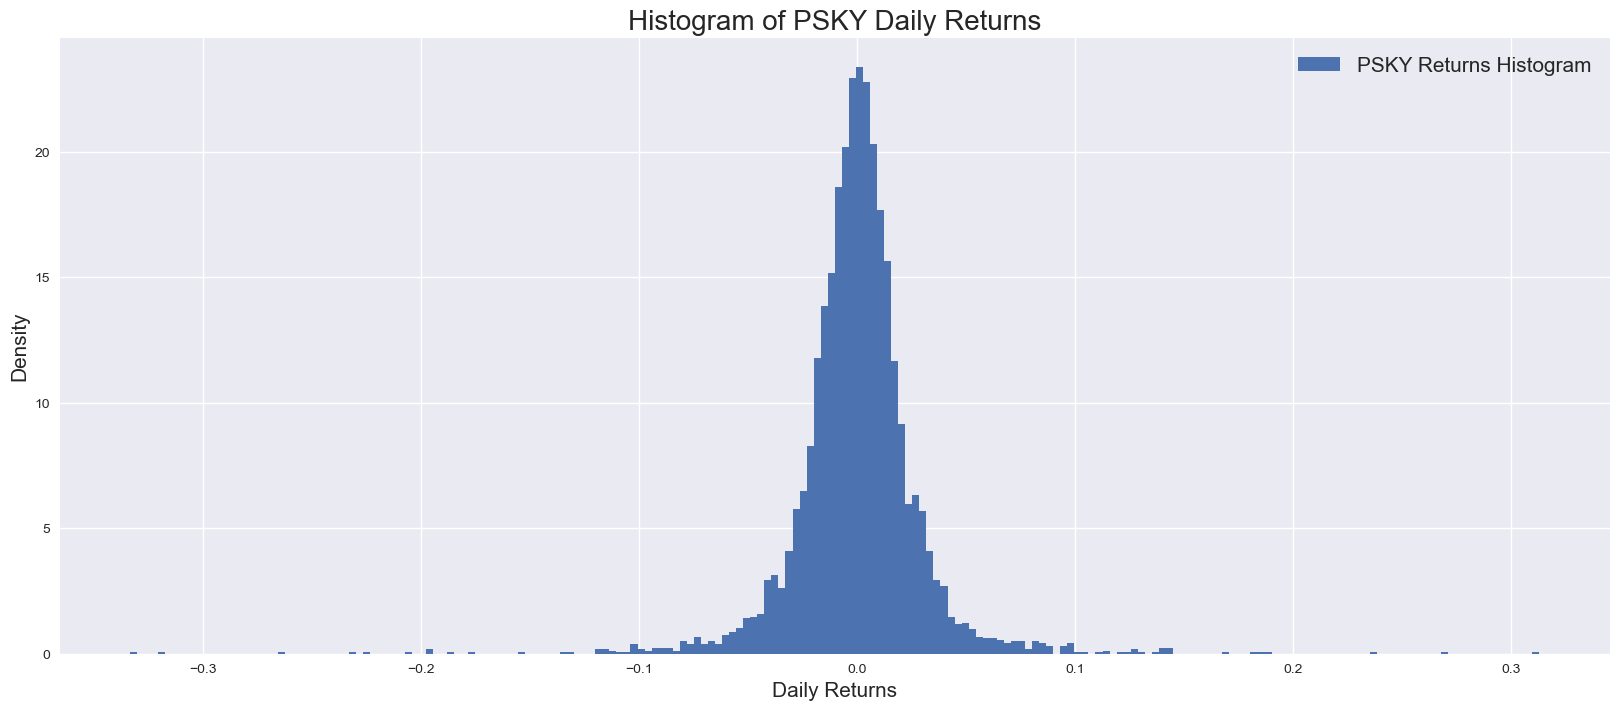

In [70]:
# histogram of daily returns
plt.figure(figsize = (20, 8))
plt.hist(returns, bins = 200, density = True, label = "PSKY Returns Histogram")
plt.title("Histogram of PSKY Daily Returns", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [71]:
# 1% lowest returns in history
np.percentile(returns, 1)

np.float64(-0.08052252659009135)

In [72]:
# or
np.percentile(returns, prob * 100)

np.float64(-0.08052252659009135)

1% of daily returns are even lower than -8.05%

In [73]:
# value at risk based on historical method
VaR_historical = IO * np.percentile(returns, prob * 100)
VaR_historical

np.float64(-80522.52659009135)